In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [319]:
df = pd.read_csv('/content/household_power_consumption.txt', delimiter=';')
df.head(5)

<ipython-input-319-15d650499ad2>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt', delimiter=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [320]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [321]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-321-b9c6864122be>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [322]:
df['Time'] = pd.to_datetime(df['Time']).dt.time

In [323]:
df['Datetime']=df.apply(lambda x: pd.datetime.combine(x['Date'],x['Time']),axis=1)

<ipython-input-323-c17967c8c7b5>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['Datetime']=df.apply(lambda x: pd.datetime.combine(x['Date'],x['Time']),axis=1)


In [324]:
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [325]:
df=df.drop(['Date','Time'],axis=1)

In [326]:
df.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [327]:
df2=df.set_index('Datetime')
df2.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [328]:
df2.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [329]:
df2['Global_active_power']=pd.to_numeric(df2['Global_active_power'],errors='coerce')
df2['Global_reactive_power']=pd.to_numeric(df2['Global_reactive_power'],errors='coerce')
df2['Voltage']=pd.to_numeric(df2['Voltage'],errors='coerce')
df2['Global_intensity']=pd.to_numeric(df2['Global_intensity'],errors='coerce')
df2['Sub_metering_1']=pd.to_numeric(df2['Sub_metering_1'],errors='coerce')
df2['Sub_metering_2']=pd.to_numeric(df2['Sub_metering_2'],errors='coerce')

df2.dtypes


Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [330]:
df2.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,225942.000000,225942.000000,225942.000000,225942.000000,225941.000000,225941.000000,225941.000000
mean,1.305536,0.120690,239.675234,5.549636,1.272558,1.727978,6.292970
std,1.253405,0.111099,3.666330,5.293912,6.554234,6.949359,8.355427
min,0.104000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000
25%,0.312000,0.000000,237.110000,1.400000,0.000000,0.000000,0.000000
50%,0.912000,0.104000,239.990000,4.000000,0.000000,0.000000,0.000000
75%,1.876000,0.188000,242.300000,8.000000,0.000000,1.000000,17.000000
max,10.670000,0.988000,251.700000,46.400000,77.000000,78.000000,20.000000


In [331]:
hourly_data = df2.resample('H').sum()

In [332]:
daily_data = hourly_data.resample('D').sum()

In [333]:
daily_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2007-12-01,1461.296,199.140,347815.02,6205.2,0.0,439.0,8276.0
2007-12-02,1877.610,136.704,345741.84,7925.0,2227.0,399.0,11517.0
2007-12-03,1950.668,134.422,346404.55,8249.0,1403.0,2841.0,12353.0


In [334]:
import matplotlib.pyplot as plt
%matplotlib inline

In [335]:
daily_data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

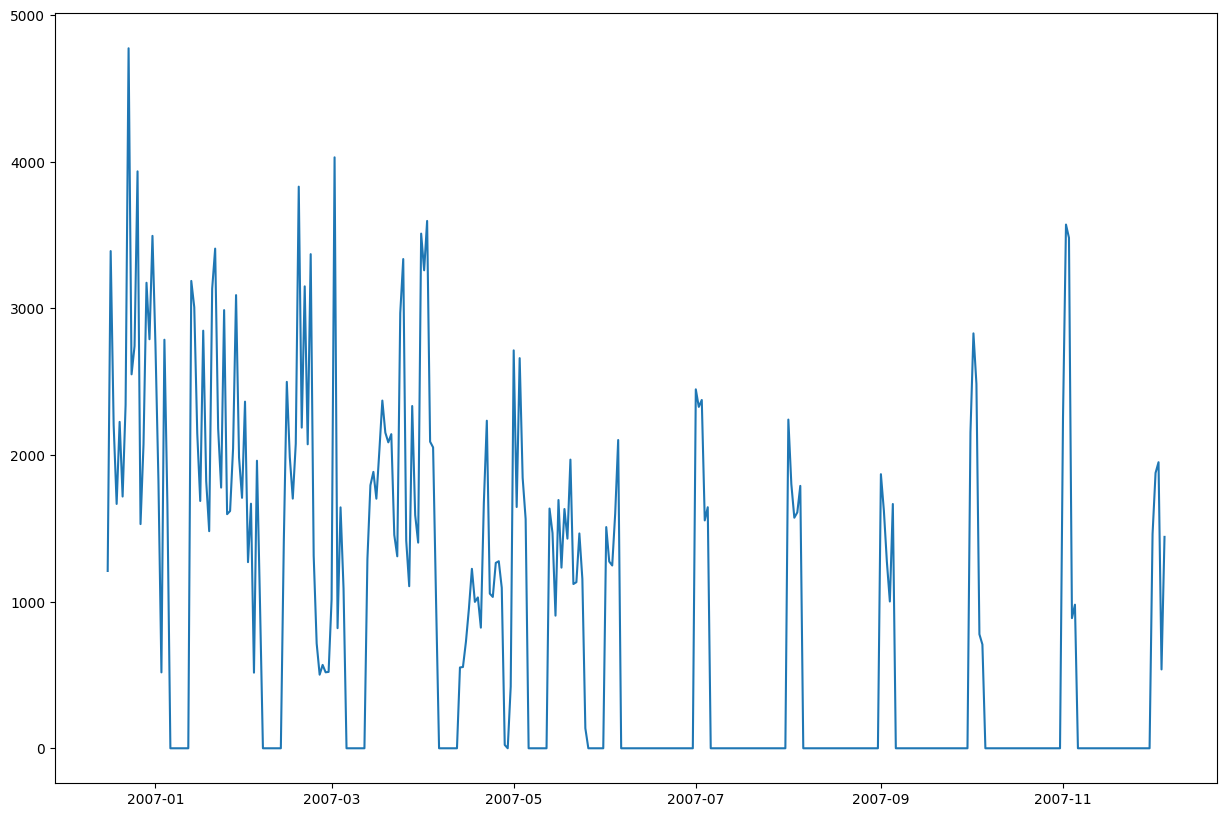

In [336]:
plt.figure(figsize=(15,10))
plt.plot(daily_data['Global_active_power'])

In [337]:
data=pd.read_csv('/content/household_daily.csv')

In [338]:
data=data.set_index('Datetime')
data.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [339]:
data.tail(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2007-12-01,1461.296,199.140,347815.02,6205.2,0.0,439.0,8276.0
2007-12-02,1877.610,136.704,345741.84,7925.0,2227.0,399.0,11517.0
2007-12-03,1950.668,134.422,346404.55,8249.0,1403.0,2841.0,12353.0
2007-12-04,537.706,147.812,345968.73,2301.0,0.0,541.0,1818.0
2007-12-05,1441.566,209.172,338000.98,6279.2,2247.0,1075.0,10408.0


In [340]:
data.shape

(355, 7)

In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 2006-12-16 to 2007-12-05
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    355 non-null    float64
 1   Global_reactive_power  355 non-null    float64
 2   Voltage                355 non-null    float64
 3   Global_intensity       355 non-null    float64
 4   Sub_metering_1         355 non-null    float64
 5   Sub_metering_2         355 non-null    float64
 6   Sub_metering_3         355 non-null    float64
dtypes: float64(7)
memory usage: 22.2+ KB


In [342]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,830.916811,76.814023,152542.821465,3532.100845,809.923944,1099.777465,4005.183099
std,1089.428252,90.099718,171055.429436,4612.995714,1510.537018,1974.628516,5220.829766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1638.779000,164.171000,345804.975000,6996.300000,1126.000000,1093.500000,8257.000000
max,4773.386000,311.928000,351025.000000,20200.400000,10346.000000,12109.000000,19509.000000


In [343]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

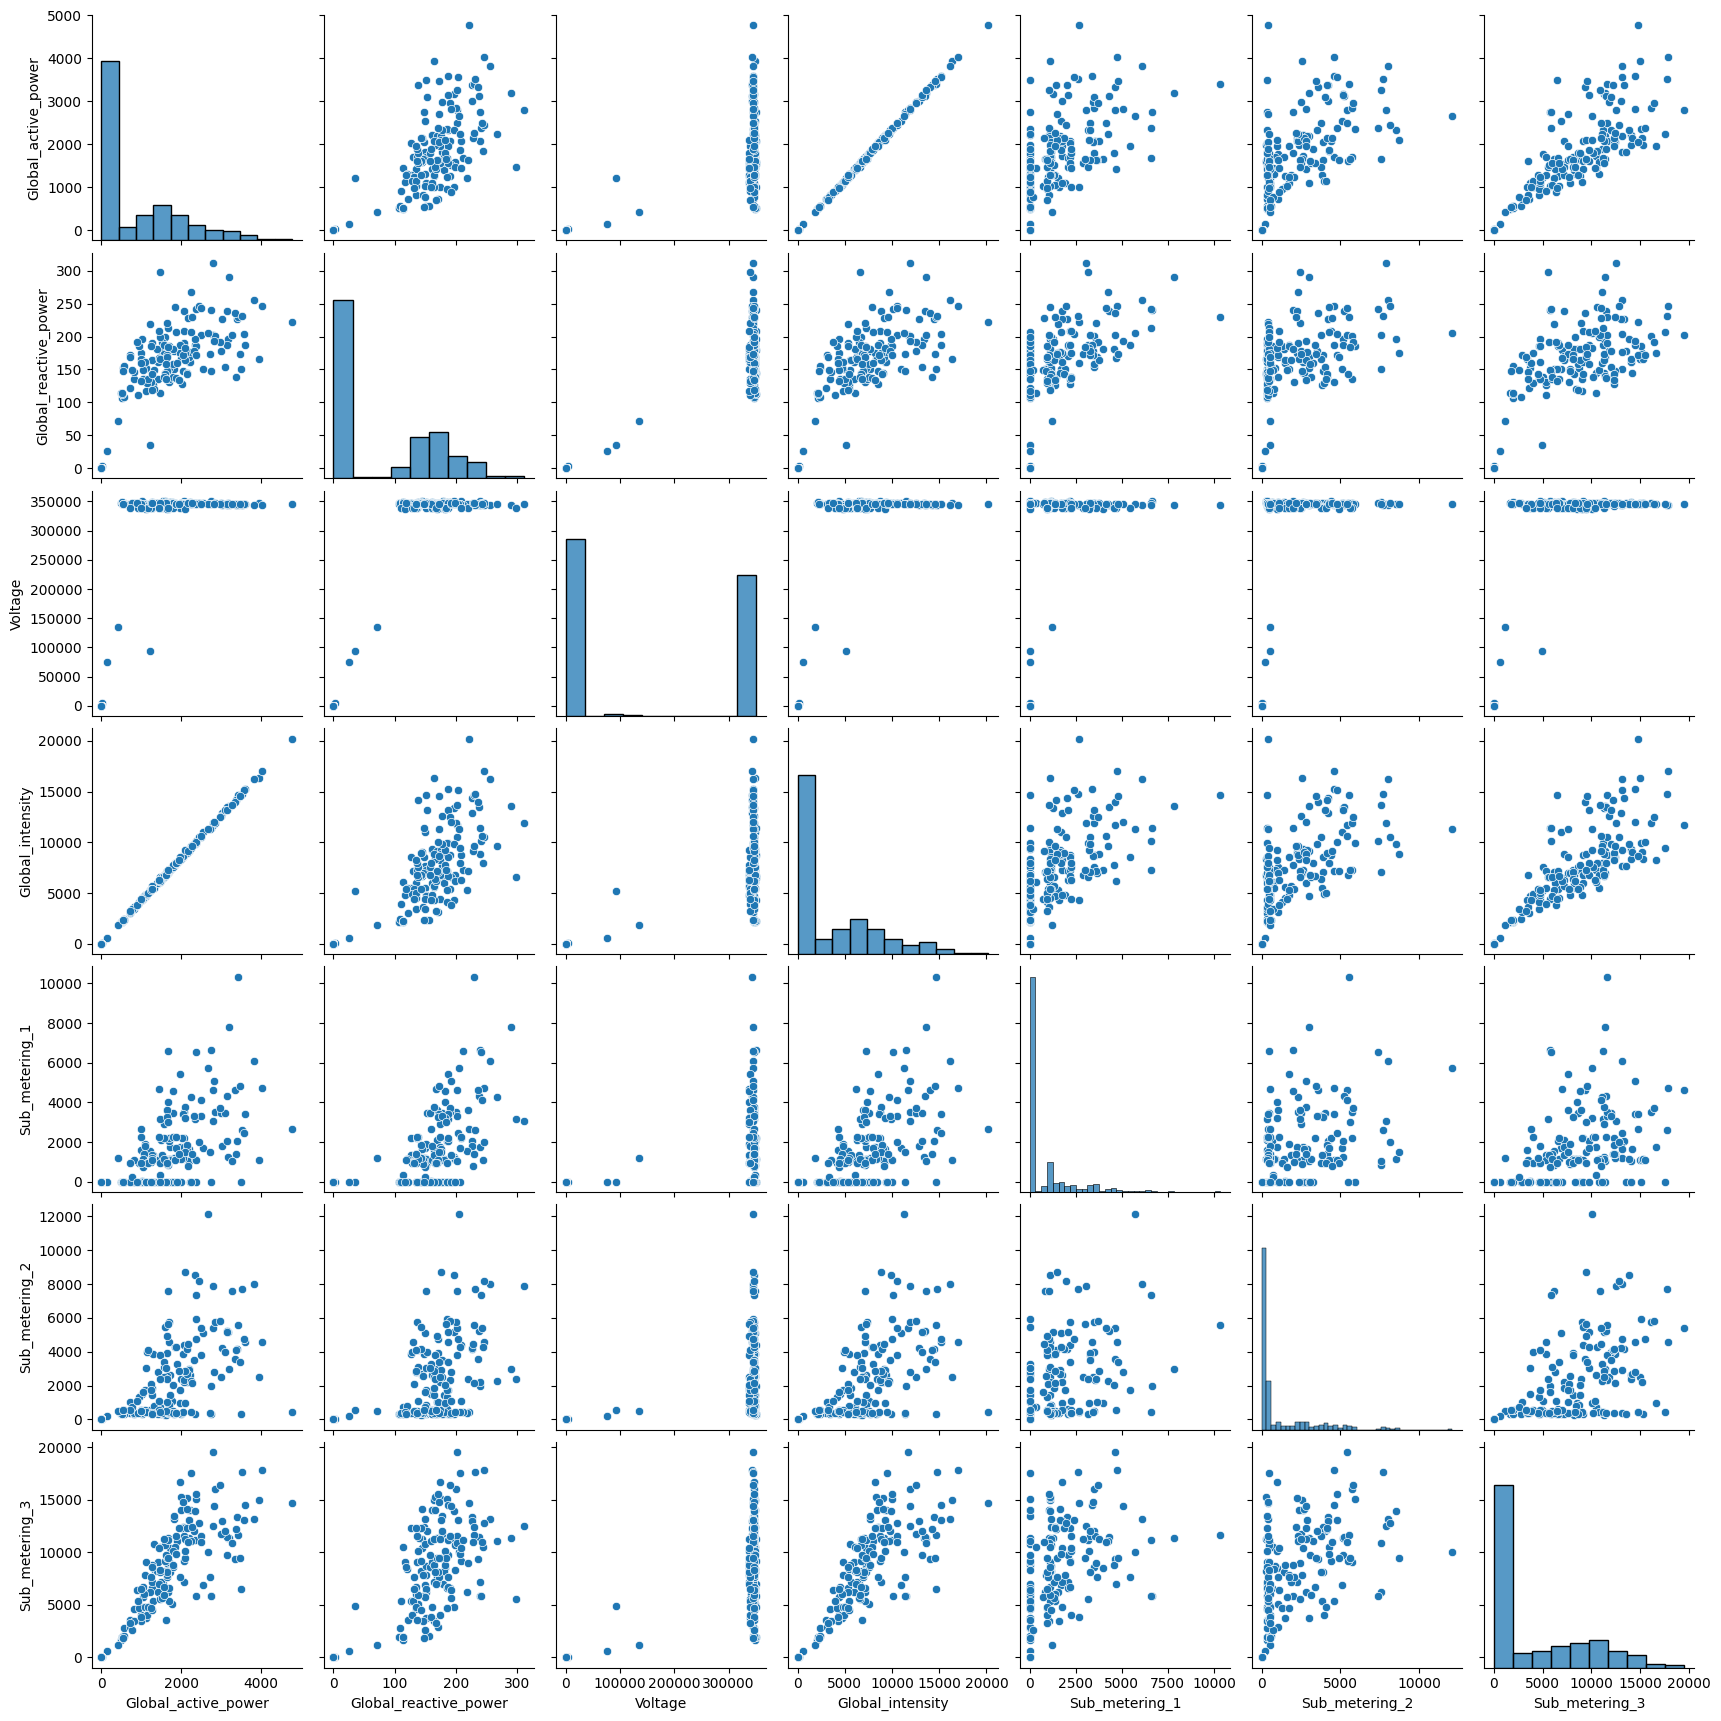

In [344]:
sns.pairplot(data=data)

In [345]:
result = adfuller(data['Voltage'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -4.151619908096582
p-value: 0.0007947898383114089


**p-value is less than 0.05 significance level.
Therefore the data is stationary**

In [346]:
import plotly.express as px

array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>], dtype=object)

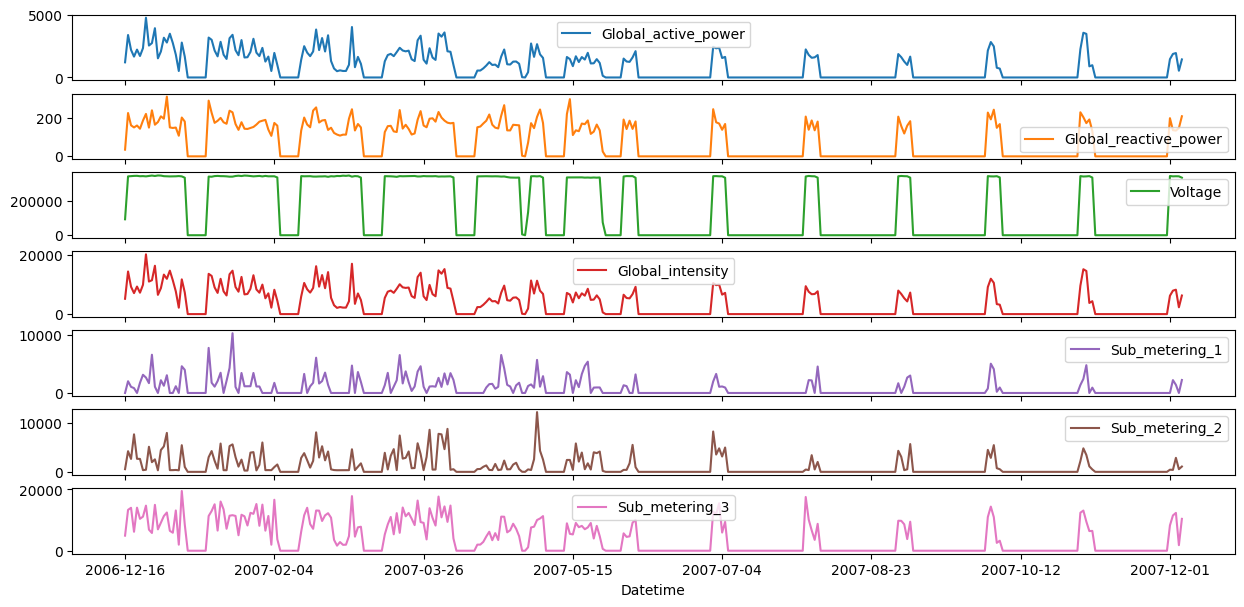

In [347]:
data.plot(subplots=True)

In [348]:
print ("\nMissing values :  ", data.isnull().any())


Missing values :   Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool


In [349]:
!pip install pmdarima

In [350]:
import pmdarima as pm

In [351]:
model = pm.auto_arima(data['Voltage'],
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=9560.096, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=9565.762, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=9105.708, Time=0.32 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=9359.582, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=9771.935, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=9104.131, Time=0.06 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=9105.560, Time=0.18 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=9107.309, Time=0.89 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=9102.101, Time=0.28 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=9103.610, Time=0.98 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=9103.528, Time=1.16 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=9105.479, Time=1.01 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=9102.204, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=9103.719, Time=0.54 sec
 ARIMA(1,0,1)(0,0,0

In [393]:
train=data[(data.index.get_level_values(0) >= '2006-12-16') & (data.index.get_level_values(0) <= '2007-12-01')]

In [394]:
test=data[(data.index.get_level_values(0) > '2007-12-01')]

In [395]:
test

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2007-12-02,1877.610,136.704,345741.84,7925.0,2227.0,399.0,11517.0
2007-12-03,1950.668,134.422,346404.55,8249.0,1403.0,2841.0,12353.0
2007-12-04,537.706,147.812,345968.73,2301.0,0.0,541.0,1818.0
2007-12-05,1441.566,209.172,338000.98,6279.2,2247.0,1075.0,10408.0


In [401]:
model.fit(train['Voltage'])

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [402]:
forecast=model.predict(n_periods=4, return_conf_int=True)

In [403]:
forecast

(2007-12-02    353694.035594
 2007-12-03    321432.610280
 2007-12-04    290219.564227
 2007-12-05    264148.696047
 Freq: D, dtype: float64,
 array([[181262.93495611, 526125.1362312 ],
        [ 83871.55079257, 558993.6697677 ],
        [ 16431.78932141, 564007.33913222],
        [-31363.18827729, 559660.58037158]]))

In [404]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

In [405]:
forecast_df

,Prediction
Datetime,
2007-12-02,353694.035594
2007-12-03,321432.610280
2007-12-04,290219.564227
2007-12-05,264148.696047


In [406]:
import matplotlib.pyplot as plt

<Axes: xlabel='Datetime'>

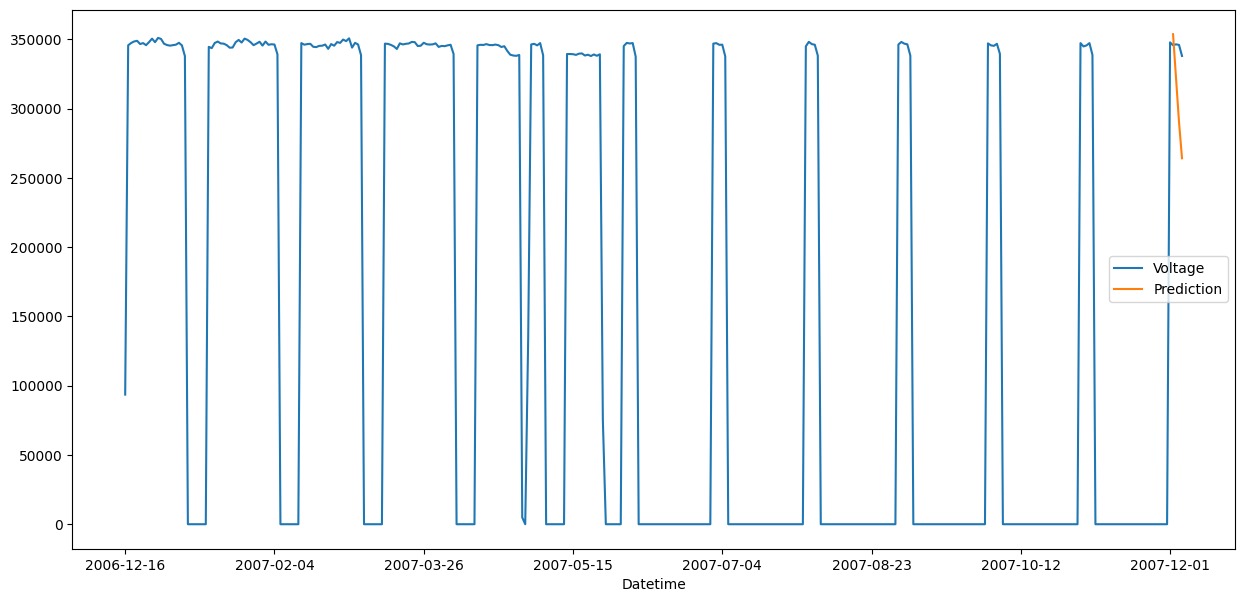

In [407]:
pd.concat([data['Voltage'],forecast_df],axis=1).plot()